In [11]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Problem 1

$A = 
 \begin{bmatrix}
  \alpha^{(1)} & 0 & \cdots & 0 \\
  0 & \alpha^{(2)} & \cdots & 0 \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  0 & 0 & \cdots & \alpha^{(N)}
 \end{bmatrix}$

$J(\Theta) = EAE^T = (Y - \Theta^TX)A(Y - \Theta^TX)^T = YAY^T - \Theta^TXAY^T - YAX^T\Theta + \Theta^TXAX^T\Theta=YAY^T - 2\Theta^TXAY^T + \Theta^TXAX^T\Theta$

$\dfrac{\delta J(\Theta)}{\delta \Theta} = \dfrac{\delta (YAY^T - 2\Theta^TXAY^T + \Theta^TXAX^T\Theta)}{\delta \Theta}
= \dfrac{\delta (- 2\Theta^TXAY^T + \Theta^TXAX^T\Theta)}{\delta \Theta}
= - 2XAY^T + 2 XAX^T\Theta$

$- 2XAY^T + 2 XAX^T\Theta = 0$

$ XAX^T\Theta = XAY^T $

$ \Theta = (XAX^T)^{-1}XAY^T $

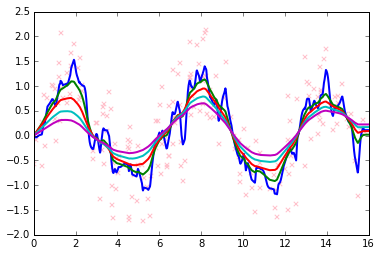

In [62]:
import numpy
from numpy import *
from matplotlib import pyplot

begin, end = 0, 16
sigma = 0.8

X = sort(random.uniform(begin, end, 200))
Y = array([random.normal(sin(x), sigma **  2) for x in X])
D = 0.1

def WLR(x, X, Y, D):
    def weights(x):
        return exp(-abs(X - x) / D)
    
    A = diag(weights(x))
    Theta = dot(inv(array(dot(dot(X, A), X.T)).reshape(1, 1)), dot(dot(X, A), Y.T))
    
    return x * Theta
    
Xp = linspace(begin, end, 1000)
Yp = [array([WLR(x, X, Y, D)[0][0] for x in Xp]) for D in linspace(0.1, 1.0, 5)]

pyplot.xlim(begin, end)    
pyplot.scatter(X, Y, marker = 'x', color = 'pink')
for yp in Yp:
    pyplot.plot(Xp, yp, lw = 2)
pyplot.show()

Non-parametric.